In [65]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
db = r'C:/Users/jonat/UO_Bootcamp/Group_project/git_Water_Quality_Analysis/Water_Quality_Analysis/Database/database.sqlite3'

In [3]:
# Connect to SQLite database
conn = sqlite3.connect(db)
  
# Create cursor object
cursor = conn.cursor()

In [4]:
cursor.execute('SELECT name from sqlite_master where type= "table"')

In [5]:
print(cursor.fetchall())

[('FIPS_Codes',), ('Utilities',), ('all_contaminants',), ('Contaminant_Summary',), ('Census_Data',)]


In [7]:
utils_df = pd.read_sql_query('SELECT * FROM Contaminant_Summary', conn)

In [8]:
utils_df.head()

,County_FIPS,Num_Contaminants,Sum_Population_Served,Sum_ContaminantFactor,Min_Contaminant_Factor,Max_Contaminant_Factor,Avg_Contaminant_Factor
0,8069,4,264021,4744,984,1519,1186.00
1,10001,9,70580,4987,201,1395,554.11
2,10003,20,555453,15583,68,4732,779.15
3,10005,11,205901,5456,91,1295,496.00
4,16019,1,2982,42,42,42,42.00


In [14]:
utils_df.shape

(883, 7)

In [16]:
utils_df.isna().sum()

County_FIPS               0
Num_Contaminants          0
Sum_Population_Served     0
Sum_ContaminantFactor     0
Min_Contaminant_Factor    0
Max_Contaminant_Factor    0
Avg_Contaminant_Factor    0
dtype: int64

In [10]:
census_df = pd.read_sql_query('SELECT * FROM Census_Data', conn)

In [11]:
census_df.head()

,county_FIPS,Geographic_Area_Name,County,GEOID,Total_Population,White,Black,Native,Asian,Pacific_Islander,...,pct_Other,pct_Not_White,pct_Hispanic,pct_Not_Hispanic,pct_Two_or_more_Races,Simpson_Race_DI,Simpson_Ethnic_DI,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index
0,1001,"Autauga County, Alabama",Autauga County,0500000US01001,58805,42160,11446,218,882,36,...,0.015492,0.283156,0.036000,0.964000,0.053703,0.444747,0.069410,0.986667,0.155018,0.4552
1,1003,"Baldwin County, Alabama",Baldwin County,0500000US01003,231767,189399,18218,1583,2068,144,...,0.023023,0.182830,0.054736,0.945264,0.064828,0.321154,0.103480,0.868861,0.212231,0.4566
2,1005,"Barbour County, Alabama",Barbour County,0500000US01005,25223,11317,11934,117,118,2,...,0.041232,0.551560,0.059866,0.940134,0.027792,0.572334,0.112569,1.164057,0.226599,0.5047
3,1007,"Bibb County, Alabama",Bibb County,0500000US01007,22293,16555,4414,61,33,10,...,0.020903,0.257659,0.033194,0.966806,0.034091,0.407736,0.064188,0.879973,0.145676,0.4500
4,1009,"Blount County, Alabama",Blount County,0500000US01009,59134,50663,846,338,179,25,...,0.058038,0.143352,0.097592,0.902408,0.061843,0.258546,0.176138,0.808008,0.319759,0.4685


In [113]:
#join the df's
#df= utils_df.merge(census_df, how='left', left_on= 'County_FIPS', right_on='county_FIPS')
df = pd.read_sql_query("SELECT * FROM Census_Data INNER JOIN Contaminant_Summary on Census_Data.county_FIPS = Contaminant_Summary.county_FIPS",conn)

In [114]:
df.tail(20)

,county_FIPS,Geographic_Area_Name,County,GEOID,Total_Population,White,Black,Native,Asian,Pacific_Islander,...,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index,County_FIPS,Num_Contaminants,Sum_Population_Served,Sum_ContaminantFactor,Min_Contaminant_Factor,Max_Contaminant_Factor,Avg_Contaminant_Factor
862,6051,"Mono County, California",Mono County,0500000US06051,13195,9349,75,296,164,32,...,1.298607,0.579019,0.4018,6051,34,14906,27137,0,9253,798.15
863,6053,"Monterey County, California",Monterey County,0500000US06053,439035,158879,9944,12782,26681,2133,...,1.731710,0.671218,0.4552,6053,105,140458,112511,1,989,1071.53
864,6055,"Napa County, California",Napa County,0500000US06055,138019,76158,2444,1950,10754,349,...,1.638730,0.649758,0.4786,6055,6,293686,4957,1846,80,826.17
865,6059,"Orange County, California",Orange County,0500000US06059,3186989,1383257,53843,38323,706814,9036,...,1.780297,0.641711,0.4660,6059,29,3320487,76395,1086,968,2634.31
866,6061,"Placer County, California",Placer County,0500000US06061,404739,288586,6891,3548,35501,1118,...,1.271181,0.422354,0.4473,6061,1,200,125,125,125,125.00
867,6065,"Riverside County, California",Riverside County,0500000US06065,2418185,995627,156478,43809,171244,8117,...,1.820164,0.693131,0.4549,6065,77,1644697,71697,0,9,931.13
868,6067,"Sacramento County, California",Sacramento County,0500000US06067,1585055,715722,152796,18638,281734,18915,...,1.857505,0.546693,0.4496,6067,2,124168,2490,1901,589,1245.00
869,6071,"San Bernardino County, California",San Bernardino County,0500000US06071,2181654,782691,184559,41664,182288,7462,...,1.868782,0.690450,0.4389,6071,100,1974282,79265,0,91,792.65
870,6073,"San Diego County, California",San Diego County,0500000US06073,3298634,1633129,155814,40969,410753,15287,...,1.780974,0.640651,0.4616,6073,63,3416810,45189,0,978,717.29
871,6075,"San Francisco County, California",San Francisco County,0500000US06075,873965,361382,46726,6476,296506,3477,...,1.673229,0.433792,0.5079,6075,3,2550,2689,1264,958,896.33


In [116]:
df.shape

(882, 37)

In [117]:
df.describe()

,county_FIPS,Total_Population,White,Black,Native,Asian,Pacific_Islander,Other,Two_or_more_Races,Hispanic,...,pct_Two_or_more_Races,Simpson_Race_DI,Simpson_Ethnic_DI,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index,Num_Contaminants,Sum_Population_Served,Sum_ContaminantFactor,Avg_Contaminant_Factor
count,882.000000,8.820000e+02,8.820000e+02,8.820000e+02,882.000000,8.820000e+02,882.000000,8.820000e+02,8.820000e+02,8.820000e+02,...,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,8.820000e+02,8.820000e+02,882.000000
mean,34216.615646,1.395653e+05,8.338217e+04,1.460549e+04,1502.502268,1.062759e+04,282.706349,1.494588e+04,1.422498e+04,2.995920e+04,...,0.061026,0.280229,0.113581,0.753765,0.211073,0.441717,10.758503,8.711697e+04,1.175539e+04,935.660215
std,15322.693185,5.038503e+05,2.057142e+05,7.359074e+04,7127.251881,7.185546e+04,1651.363024,1.124154e+05,7.137211e+04,2.060264e+05,...,0.029338,0.166876,0.108514,0.373162,0.152220,0.033689,12.639396,3.843995e+05,7.711364e+04,3060.903090
min,1001.000000,7.060000e+02,4.010000e+02,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,2.000000e+01,8.000000e+00,...,0.018930,0.063408,0.011866,0.202798,0.036514,0.315700,1.000000,2.700000e+01,0.000000e+00,0.000000
25%,26007.500000,1.247950e+04,1.049000e+04,6.800000e+01,64.000000,4.500000e+01,4.000000,1.002500e+02,5.730000e+02,2.962500e+02,...,0.042034,0.146299,0.040314,0.457942,0.100287,0.417125,4.000000,4.725250e+03,1.966500e+03,365.767500
50%,38034.000000,3.105100e+04,2.630650e+04,5.795000e+02,186.000000,1.620000e+02,12.000000,4.350000e+02,1.603500e+03,1.091500e+03,...,0.054247,0.226679,0.069034,0.669062,0.154340,0.439450,7.000000,1.545300e+04,4.770000e+03,701.010000
75%,47160.500000,8.803400e+04,7.166950e+04,4.448750e+03,719.750000,9.977500e+02,52.000000,2.177500e+03,5.622000e+03,5.601500e+03,...,0.071544,0.384804,0.142876,0.980501,0.272424,0.463475,14.000000,4.685075e+04,1.104950e+04,1144.755000
max,56045.000000,1.001401e+07,3.259427e+06,1.205825e+06,163465.000000,1.499985e+06,24523.000000,2.784181e+06,1.488069e+06,4.804763e+06,...,0.277103,0.768684,0.499984,1.956877,0.693131,0.550900,154.000000,7.822450e+06,2.215481e+06,88619.240000


In [118]:
df.columns

Index(['county_FIPS', 'Geographic_Area_Name', 'County', 'GEOID',
       'Total_Population', 'White', 'Black', 'Native', 'Asian',
       'Pacific_Islander', 'Other', 'Two_or_more_Races', 'Hispanic',
       'Not_Hispanic', 'Not_White', 'pct_White', 'pct_Black', 'pct_Native',
       'pct_Asian', 'pct_Pacific_Islander', 'pct_Other', 'pct_Not_White',
       'pct_Hispanic', 'pct_Not_Hispanic', 'pct_Two_or_more_Races',
       'Simpson_Race_DI', 'Simpson_Ethnic_DI', 'Shannon_Race_DI',
       'Shannon_Ethnic_DI', 'Gini_Index', 'County_FIPS', 'Num_Contaminants',
       'Sum_Population_Served', 'Sum_ContaminantFactor',
       'Min_Contaminant_Factor', 'Max_Contaminant_Factor',
       'Avg_Contaminant_Factor'],
      dtype='object')

In [119]:
df2 = df[['Num_Contaminants', 'Sum_Population_Served',
            'Sum_ContaminantFactor', 'Min_Contaminant_Factor',
            'Max_Contaminant_Factor', 'Avg_Contaminant_Factor',
            'Simpson_Ethnic_DI', 'Simpson_Race_DI',
            'Shannon_Race_DI', 'Shannon_Ethnic_DI','Gini_Index'
           ]]

In [120]:
df2

,Num_Contaminants,Sum_Population_Served,Sum_ContaminantFactor,Min_Contaminant_Factor,Max_Contaminant_Factor,Avg_Contaminant_Factor,Simpson_Ethnic_DI,Simpson_Race_DI,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index
0,4,264021,4744,984,1519,1186.00,0.217826,0.309413,0.948124,0.375569,0.4428
1,9,70580,4987,201,1395,554.11,0.141942,0.573395,1.305087,0.271086,0.4191
2,20,555453,15583,68,4732,779.15,0.197811,0.618709,1.464587,0.349206,0.4607
3,11,205901,5456,91,1295,496.00,0.200263,0.430910,1.161943,0.352475,0.4561
4,1,2982,42,42,42,42.00,0.237762,0.290288,0.919484,0.401124,0.4287
...,...,...,...,...,...,...,...,...,...,...,...
877,2,500,1188,377,811,594.00,0.453882,0.589002,1.532958,0.646291,0.4728
878,1,100147,1104,1104,1104,1104.00,0.405472,0.761847,1.949749,0.595389,0.4147
879,1,495,20,20,20,20.00,0.411229,0.561896,1.510993,0.601542,0.4512
880,84,238210,58802,0,97,700.02,0.451947,0.687672,1.597896,0.644292,0.4602


<AxesSubplot:>

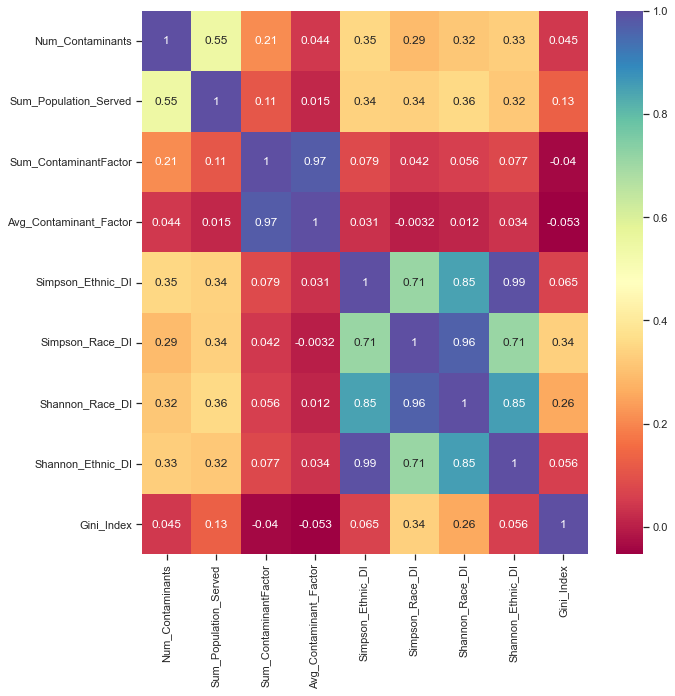

In [121]:
#Check to see if we can do dimensionality reduction
#Use the heatmap plot to see if we have any strong correlations and if so we can drop that feature
plt.figure(figsize=(10, 10))
sns.heatmap(df2.corr(), annot=True, cmap='Spectral' )

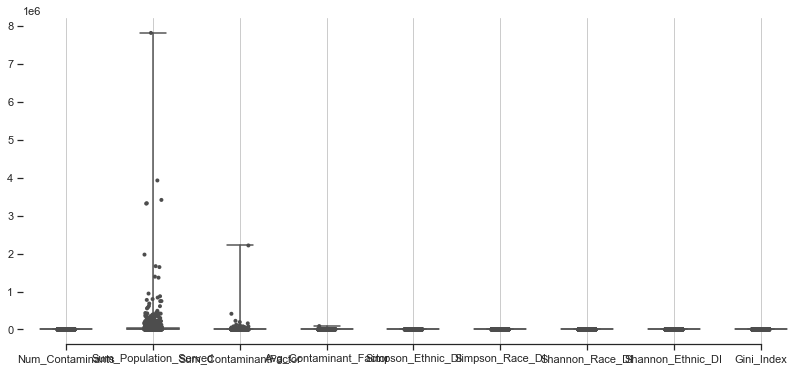

In [122]:
sns.set_theme(style="ticks")

# Initialize the figure 
f, ax = plt.subplots(figsize=(14, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(data=df2, whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(data=df2, size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

<Figure size 1440x1440 with 0 Axes>

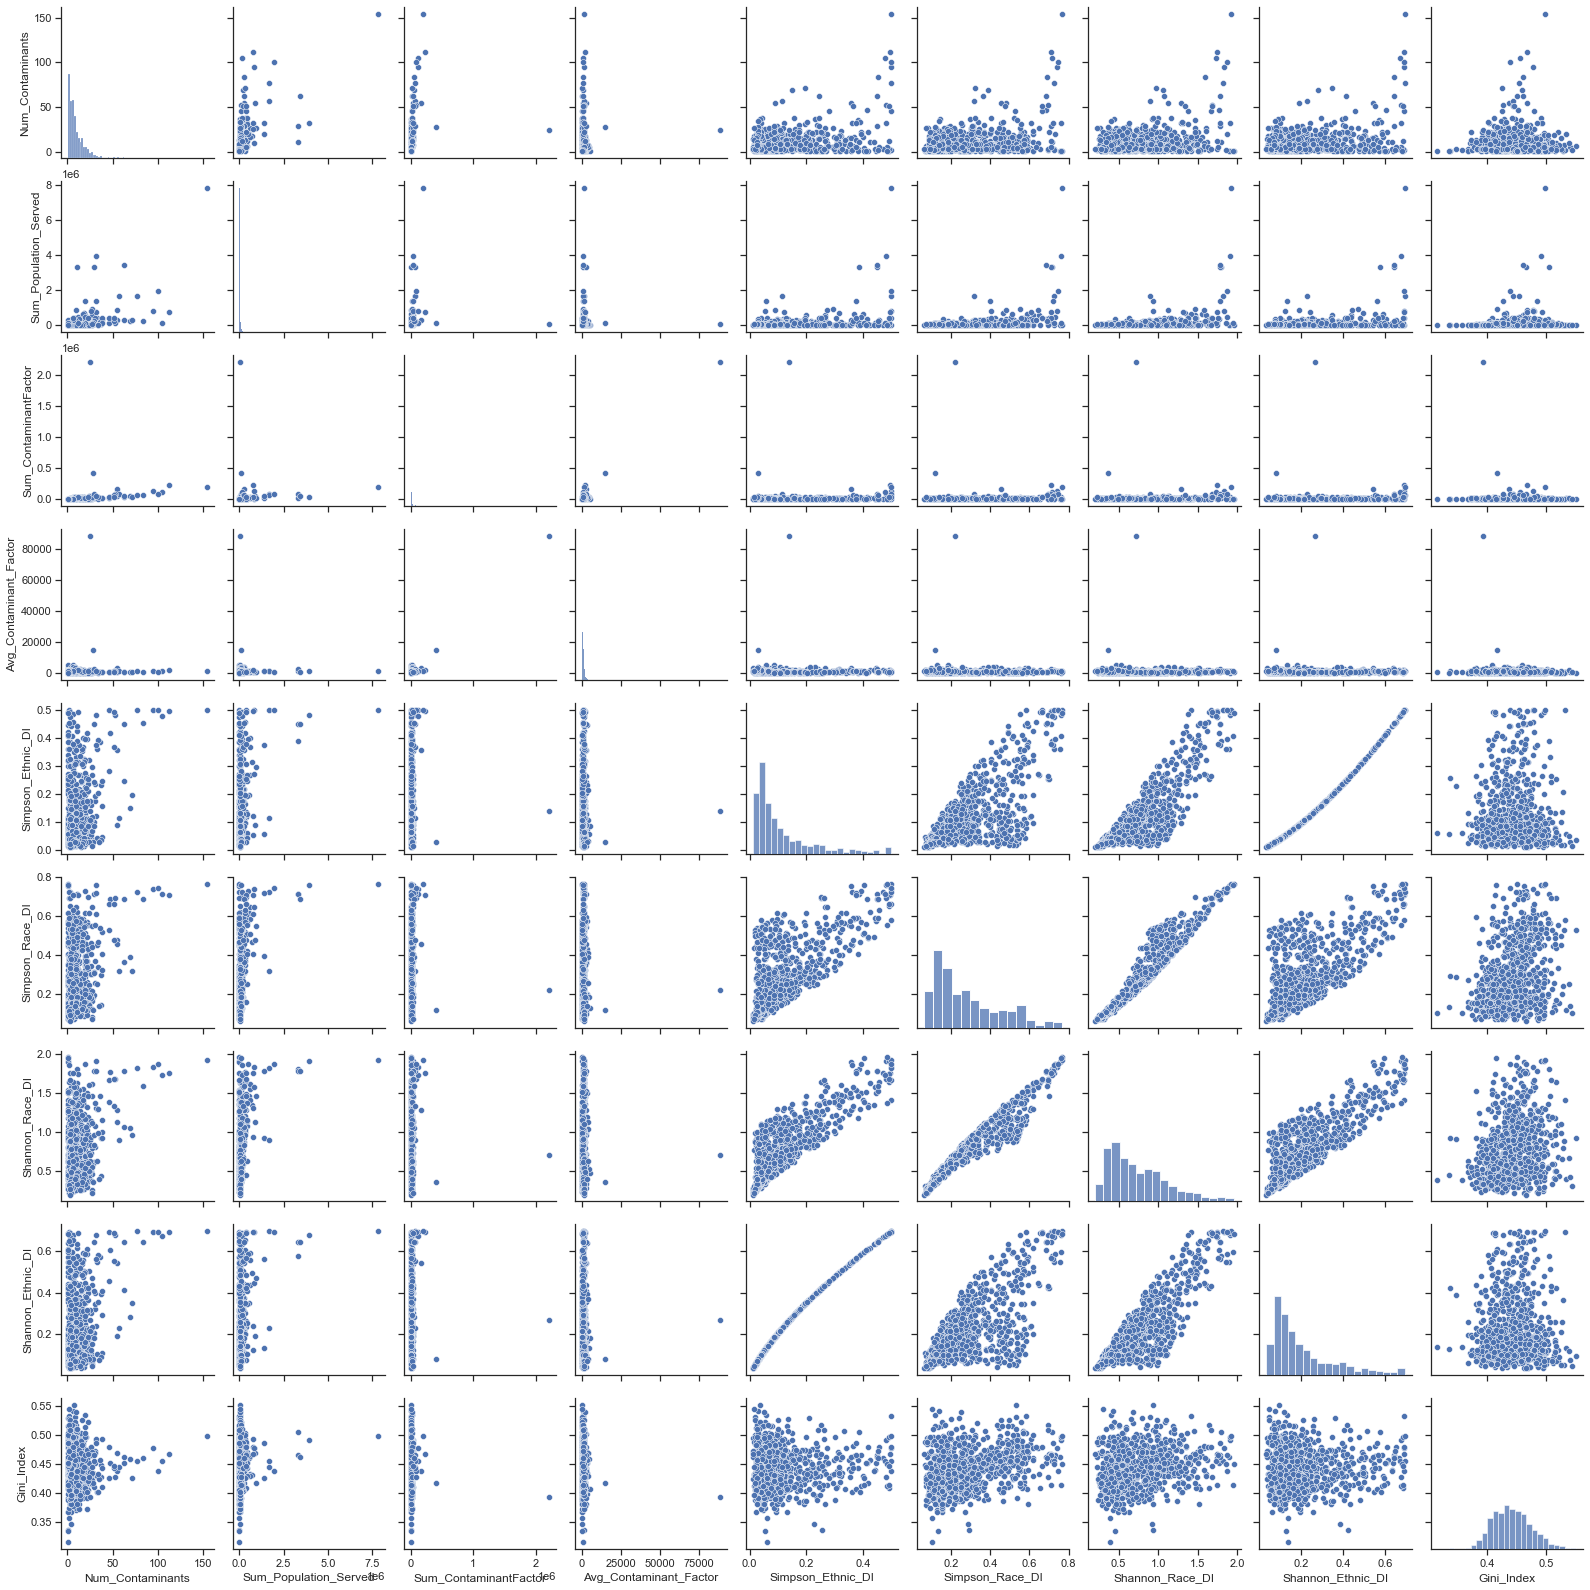

In [123]:
plt.figure(figsize=(20, 20))
sns.pairplot(df2)

Images\Num_Contaminants
Images\Sum_Population_Served
Images\Sum_ContaminantFactor


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

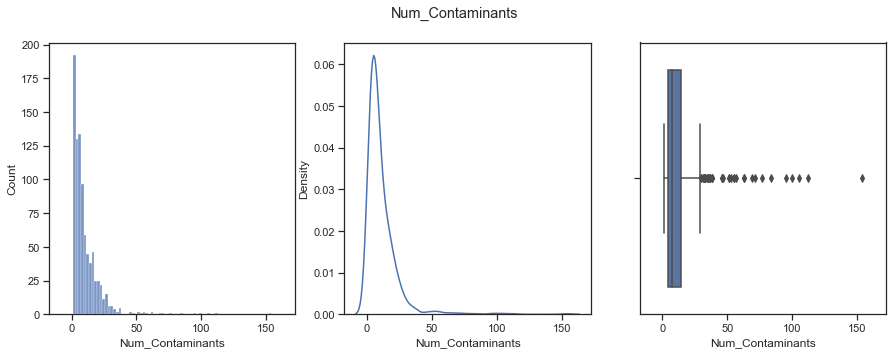

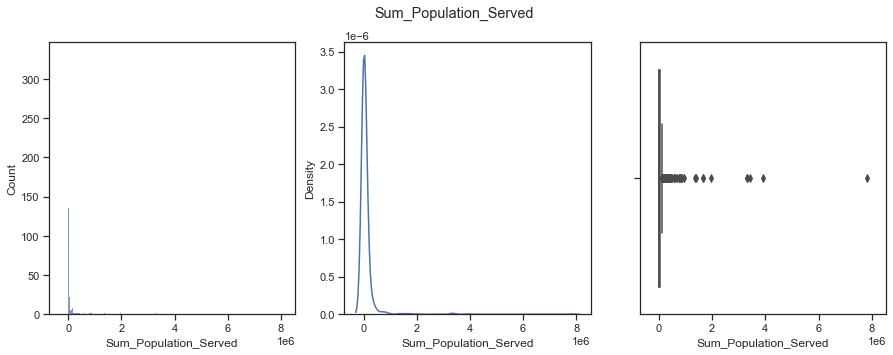

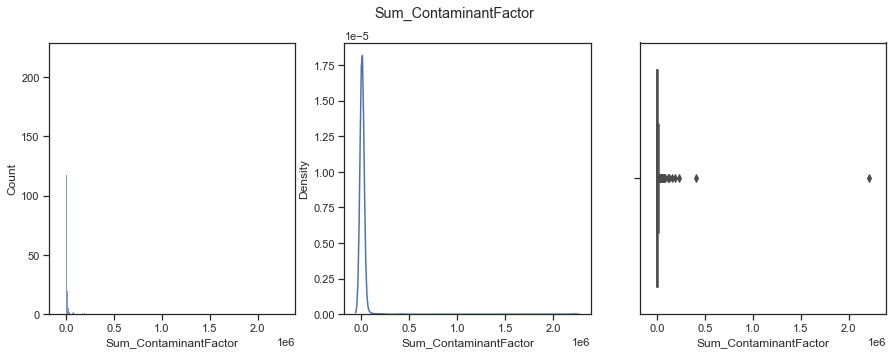

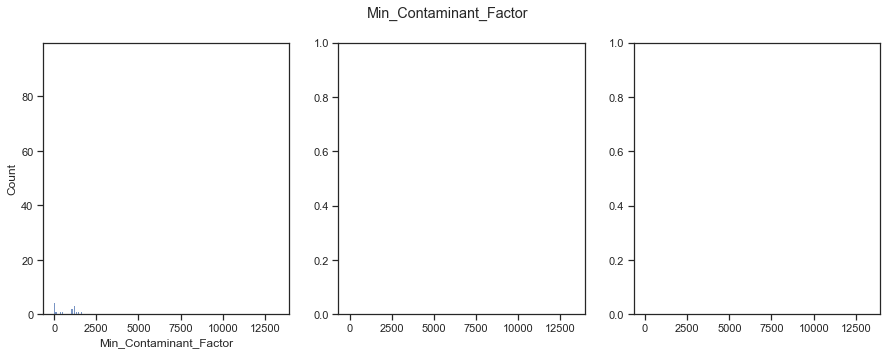

In [169]:
image_dir = os.path.join('Images')
for column in df2.columns:
    file_out = os.path.join(image_dir,column)
    fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
    fig.suptitle(column)
    #plt.tight_layout()
    sns.histplot(data=df2, x=column, ax=axes[0])
    sns.kdeplot(data=df2, x=column, ax=axes[1])
    sns.boxplot(data=df2, x=column, ax=axes[2])

    plt.savefig(file_out)
    
    
    print(file_out)

In [ ]:
file_out = os.path.join(image_dir,column)
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
fig.suptitle(column)
#plt.tight_layout()
sns.histplot(data=df2, x=column, ax=axes[0])
sns.kdeplot(data=df2, x=column, ax=axes[1])
sns.boxplot(data=df2, x=column, ax=axes[2])

plt.savefig(file_out)

In [125]:
df2.columns


Index(['Num_Contaminants', 'Sum_Population_Served', 'Sum_ContaminantFactor',
       'Min_Contaminant_Factor', 'Max_Contaminant_Factor',
       'Avg_Contaminant_Factor', 'Simpson_Ethnic_DI', 'Simpson_Race_DI',
       'Shannon_Race_DI', 'Shannon_Ethnic_DI', 'Gini_Index'],
      dtype='object')

In [141]:
priority_col = ['Contaminant_Score',
                'Simpson_Race_DI_score',
                 'Simpson_Ethnic_DI_score', 
                 'Shannon_Race_DI_score_score',
                 'Shannon_Ethnic_DI_score', 
                 'Gini_Index_score'               
               ]
priority_df = pd.DataFrame(columns=priority_col)
priority_df

,Contaminant_Score,Simpson_Race_DI_score,Simpson_Ethnic_DI_score,Shannon_Race_DI_score_score,Shannon_Ethnic_DI_score,Gini_Index_score


In [142]:
cont = pd.Series(df2.Sum_ContaminantFactor)
SR_DI = pd.Series(df2.Simpson_Race_DI)
SE_DI = pd.Series(df2.Simpson_Ethnic_DI)
SHE_DI = pd.Series(df2.Shannon_Ethnic_DI)
SHR_DI = pd.Series(df2.Shannon_Race_DI)
Gini = pd.Series(df2.Gini_Index)

In [143]:
cont_mean = np.mean(cont)
SR_DI_mean = np.mean(SR_DI)
SE_DI_mean = np.mean(SE_DI)
SHE_DI_mean = np.mean(SHE_DI)
SHR_DI_mean = np.mean(SHR_DI)
Gini_mean = np.mean(Gini)

In [144]:
df3 = df2[['Sum_ContaminantFactor','Simpson_Ethnic_DI', 'Simpson_Race_DI',
       'Shannon_Race_DI', 'Shannon_Ethnic_DI', 'Gini_Index']]

In [145]:
df3.columns


Index(['Sum_ContaminantFactor', 'Simpson_Ethnic_DI', 'Simpson_Race_DI',
       'Shannon_Race_DI', 'Shannon_Ethnic_DI', 'Gini_Index'],
      dtype='object')

In [146]:
Sum_ContaminantFactor_score = np.where(df3.Sum_ContaminantFactor >= cont_mean, 1, 0)
Simpson_Ethnic_DI_score = np.where(df3.Simpson_Ethnic_DI >= SE_DI_mean, 1, 0)
Simpson_Race_DI_score = np.where(df3.Simpson_Race_DI >= SE_DI_mean, 1, 0)
Shannon_Race_DI_score = np.where(df3.Shannon_Race_DI >= SHR_DI_mean, 1, 0)
Shannon_Ethnic_DI_score = np.where(df3.Shannon_Ethnic_DI >= SHE_DI_mean, 1, 0)
Gini_Index_score = np.where(df3.Gini_Index >= 0.5, 1, 0)

In [147]:
priority_df.Contaminant_Score = Sum_ContaminantFactor_score
priority_df.Simpson_Ethnic_DI_score = Simpson_Ethnic_DI_score
priority_df.Simpson_Race_DI_score = Simpson_Race_DI_score
priority_df.Shannon_Ethnic_DI_score = Shannon_Ethnic_DI_score
priority_df.Shannon_Race_DI_score_score = Shannon_Race_DI_score
priority_df.Gini_Index_score = Gini_Index_score

In [148]:
priority_df

,Contaminant_Score,Simpson_Race_DI_score,Simpson_Ethnic_DI_score,Shannon_Race_DI_score_score,Shannon_Ethnic_DI_score,Gini_Index_score
0,0,1,1,1,1,0
1,0,1,1,1,1,0
2,1,1,1,1,1,0
3,0,1,1,1,1,0
4,0,1,1,1,1,0
...,...,...,...,...,...,...
877,0,1,1,1,1,0
878,0,1,1,1,1,0
879,0,1,1,1,1,0
880,1,1,1,1,1,0


In [149]:
priority_df['Total'] = priority_df.sum(axis=1)

In [150]:
priority_df

,Contaminant_Score,Simpson_Race_DI_score,Simpson_Ethnic_DI_score,Shannon_Race_DI_score_score,Shannon_Ethnic_DI_score,Gini_Index_score,Total
0,0,1,1,1,1,0,4
1,0,1,1,1,1,0,4
2,1,1,1,1,1,0,5
3,0,1,1,1,1,0,4
4,0,1,1,1,1,0,4
...,...,...,...,...,...,...,...
877,0,1,1,1,1,0,4
878,0,1,1,1,1,0,4
879,0,1,1,1,1,0,4
880,1,1,1,1,1,0,5


In [152]:
priority_df.Total.value_counts()

1    301
4    168
2    168
5     97
0     80
3     67
6      1
Name: Total, dtype: int64

In [155]:
priority_level = np.where(priority_df.Total >= 4, 1, 0)

In [161]:
priority_df['Priority'] = priority_level

In [162]:
priority_df.sample(30)

,Contaminant_Score,Simpson_Race_DI_score,Simpson_Ethnic_DI_score,Shannon_Race_DI_score_score,Shannon_Ethnic_DI_score,Gini_Index_score,Total,Priority
353,0,1,1,1,1,0,4,1
155,0,1,1,1,1,0,4,1
525,0,1,0,0,0,0,1,0
354,0,1,0,1,0,0,2,0
624,0,1,0,0,0,0,1,0
565,1,1,1,1,1,0,5,1
468,0,1,1,1,1,0,4,1
400,1,1,0,0,0,0,2,0
633,0,1,1,1,1,0,4,1
706,1,1,0,0,0,0,2,0


In [163]:
priority_df.Priority.value_counts()

0    616
1    266
Name: Priority, dtype: int64

In [165]:
df.sample(20)

,county_FIPS,Geographic_Area_Name,County,GEOID,Total_Population,White,Black,Native,Asian,Pacific_Islander,...,Shannon_Race_DI,Shannon_Ethnic_DI,Gini_Index,County_FIPS,Num_Contaminants,Sum_Population_Served,Sum_ContaminantFactor,Min_Contaminant_Factor,Max_Contaminant_Factor,Avg_Contaminant_Factor
526,26063,"Huron County, Michigan",Huron County,0500000US26063,31407,29807,84,102,153,7,...,0.359053,0.123241,0.4271,26063,19,19160,22407,0,975,1179.32
637,29155,"Pemiscot County, Missouri",Pemiscot County,0500000US29155,15661,10280,4309,39,37,5,...,0.968481,0.122353,0.5152,29155,7,18050,1423,118,92,203.29
459,20049,"Elk County, Kansas",Elk County,0500000US20049,2483,2253,6,49,5,1,...,0.537278,0.170088,0.4314,20049,3,1110,3901,1437,936,1300.33
854,6025,"Imperial County, California",Imperial County,0500000US06025,179702,47537,4363,4267,3050,166,...,1.466031,0.419994,0.4674,6025,23,379418,32617,0,985,1418.13
230,50003,"Bennington County, Vermont",Bennington County,0500000US50003,37347,34183,431,71,407,6,...,0.482029,0.117429,0.4764,50003,12,17216,2591,1,1184,215.92
543,26099,"Macomb County, Michigan",Macomb County,0500000US26099,881217,672264,109477,2226,38422,230,...,0.932429,0.133863,0.4265,26099,20,1365739,19393,1050,977,969.65
352,1111,"Randolph County, Alabama",Randolph County,0500000US01111,21967,16772,3816,77,88,4,...,0.846755,0.126089,0.4652,1111,4,33008,2990,1099,755,747.50
837,54077,"Preston County, West Virginia",Preston County,0500000US54077,34216,30832,2043,77,58,6,...,0.493119,0.099251,0.4335,54077,4,74671,8231,1520,3317,2057.75
515,26041,"Delta County, Michigan",Delta County,0500000US26041,36903,33684,94,850,157,9,...,0.451394,0.076684,0.4382,26041,3,14139,3096,2137,874,1032.00
137,47177,"Warren County, Tennessee",Warren County,0500000US47177,40953,34794,1098,145,259,11,...,0.840568,0.316834,0.4668,47177,5,57408,5601,624,1693,1120.20


In [166]:
df['Priority'] = priority_level

In [167]:
df

,county_FIPS,Geographic_Area_Name,County,GEOID,Total_Population,White,Black,Native,Asian,Pacific_Islander,...,Shannon_Ethnic_DI,Gini_Index,County_FIPS,Num_Contaminants,Sum_Population_Served,Sum_ContaminantFactor,Min_Contaminant_Factor,Max_Contaminant_Factor,Avg_Contaminant_Factor,Priority
0,8069,"Larimer County, Colorado",Larimer County,0500000US08069,359066,295995,3816,2879,8539,326,...,0.375569,0.4428,8069,4,264021,4744,984,1519,1186.00,1
1,10001,"Kent County, Delaware",Kent County,0500000US10001,181851,107685,46999,1150,4430,126,...,0.271086,0.4191,10001,9,70580,4987,201,1395,554.11,1
2,10003,"New Castle County, Delaware",New Castle County,0500000US10003,570719,314231,146545,2157,35201,176,...,0.349206,0.4607,10003,20,555453,15583,68,4732,779.15,1
3,10005,"Sussex County, Delaware",Sussex County,0500000US10005,237378,175847,25358,1844,3071,113,...,0.352475,0.4561,10005,11,205901,5456,91,1295,496.00,1
4,16019,"Bonneville County, Idaho",Bonneville County,0500000US16019,123964,103736,627,1262,1424,155,...,0.401124,0.4287,16019,1,2982,42,42,42,42.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,6087,"Santa Cruz County, California",Santa Cruz County,0500000US06087,270861,160565,3151,3608,12554,385,...,0.646291,0.4728,6087,2,500,1188,377,811,594.00,1
878,6095,"Solano County, California",Solano County,0500000US06095,453491,175768,62158,5389,72767,4163,...,0.595389,0.4147,6095,1,100147,1104,1104,1104,1104.00,1
879,6097,"Sonoma County, California",Sonoma County,0500000US06097,488863,306684,7616,8856,22846,1841,...,0.601542,0.4512,6097,1,495,20,20,20,20.00,1
880,6107,"Tulare County, California",Tulare County,0500000US06107,473117,186255,6669,10646,17195,724,...,0.644292,0.4602,6107,84,238210,58802,0,97,700.02,1


In [168]:
priority_df.to_csv('data_with_binary_priority.csv')